Math 5001 Lab 7 Quinlin Neuhaus

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [ ]:
anscombe = np.load("anscombe.npy", allow_pickle=True)
data = [[[],[]],[[],[]],[[],[]],[[],[]]]
for indexi, row in enumerate(anscombe):
    for indexj, entry in enumerate(row):
        xybool = 0
        if indexj % 2 == 1:
            xybool = 1
        data[indexj // 2][xybool].append(entry)

for index, quartet in enumerate(data):
    plt.subplot(2,2, index + 1)
    plt.scatter(data[index][0], data[index][1], s=10)
    xdom = np.linspace(0,20,2)
    slope, intercept, r, p, sds = scipy.stats.linregress(data[index][0], data[index][1])
    ydom = slope * xdom + intercept
    plt.plot(xdom, ydom)
    plt.title(f"Quartet: {index + 1}")
    plt.xlim(0,20)
    plt.ylim(0,13)
    xmean = np.mean(data[index][0])
    ymean = np.mean(data[index][1])
    xvar = np.var(data[index][0])
    yvar = np.var(data[index][1])
    print(
        f"Data for quartet {index + 1}\n"
        f"X mean: {xmean}\n"
        f"X variance: {xvar}\n"
        f"Y mean: {ymean}\n"
        f"Y variance: {yvar}\n"
        f"Slope: {slope}\n"
        f"Intercept: {intercept}\n"
        f"Correlation: {r}\n"
    )
plt.tight_layout()



Each of the above quartets has nearly indentical summary stats, but plotting them shows that each is different.

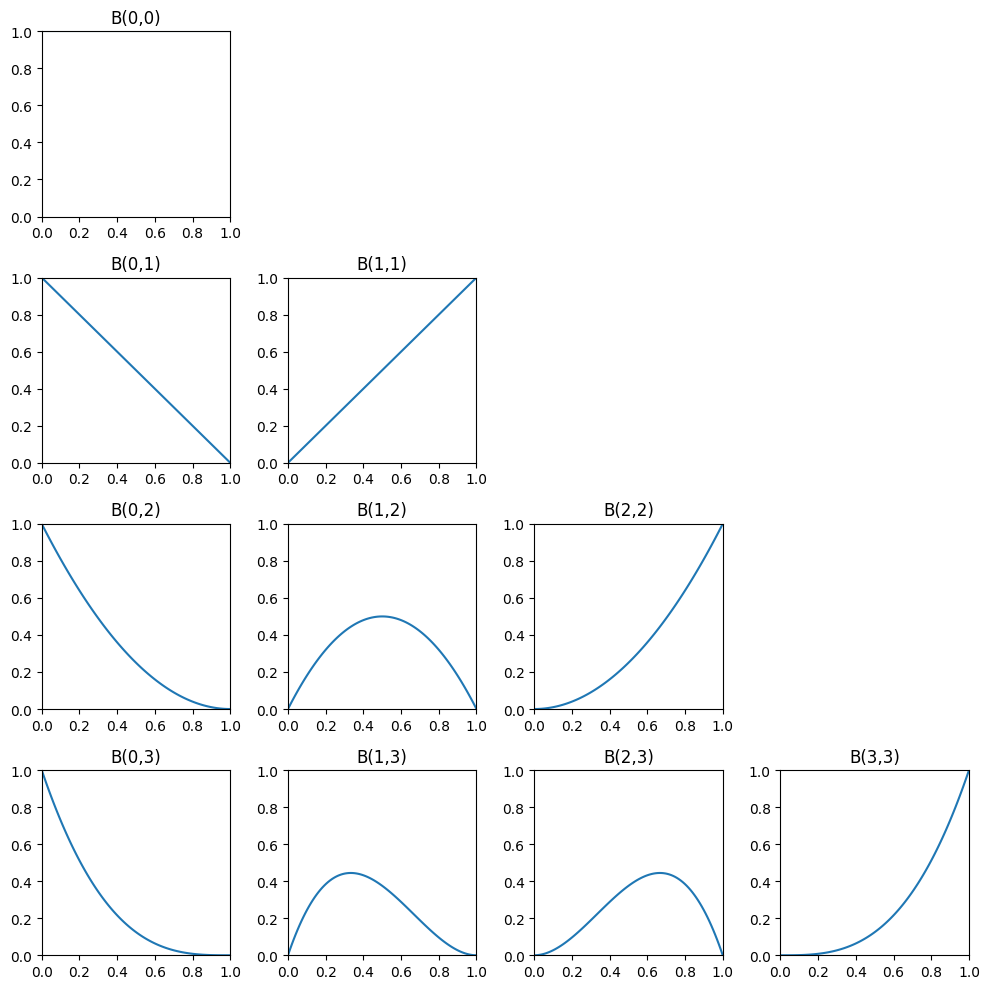

In [3]:
bernsteinx = np.linspace(0,1,100)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
for n in range(4):
    for v in range(n+1):
        bernsteiny = scipy.special.comb(n,v) * (bernsteinx ** v) * ((1 - bernsteinx) ** (n - v))
        axes[n,v].plot(bernsteinx, bernsteiny)
        axes[n,v].set_title(f"B({v},{n})")
        axes[n,v].set_xticks([i / 5 for i in range(6)])
        axes[n,v].set_yticks([i / 5 for i in range(6)])
        axes[n,v].set_xlim(0,1)
        axes[n,v].set_ylim(0,1)
        plt.xlim(0,1)
        plt.ylim(0,1)
for n in range(4):
    for v in range(n + 1, 4):
        axes[n, v].axis('off')
plt.tight_layout()

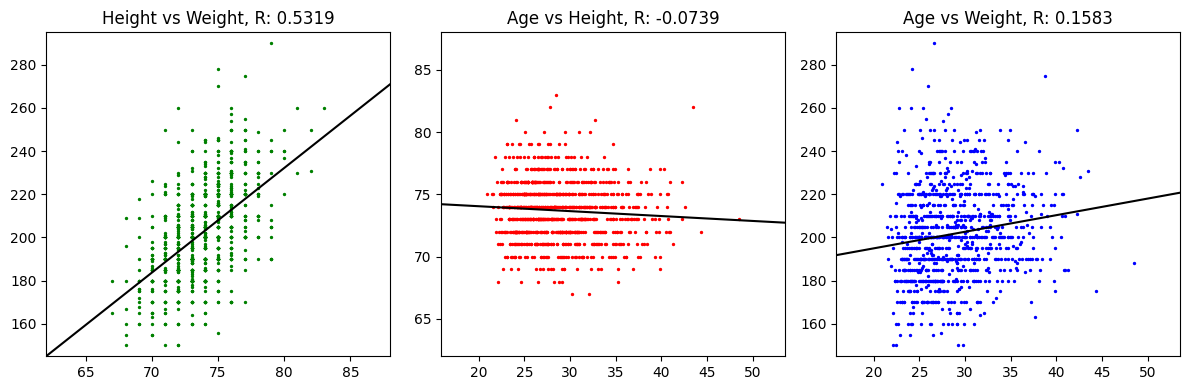

In [4]:
mlb = np.load("MLB.npy")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
x = np.linspace(0,100,1000)
axes[0].scatter(mlb[:,0], mlb[:,1], s=2, color="green")
slope, intercept, r, p, sds = scipy.stats.linregress(mlb[:,0], mlb[:,1])
y = x * slope + intercept
axes[0].plot(x,y, color="black")
axes[0].set_xlim(min(mlb[:,0]) - 5, max(mlb[:,0]) + 5)
axes[0].set_ylim(min(mlb[:,1]) - 5, max(mlb[:,1]) + 5)
axes[0].set_title(f"Height vs Weight, R: {round(r,4)}")

axes[1].scatter(mlb[:,2], mlb[:,0], s=2, color="red")
slope, intercept, r, p, sds = scipy.stats.linregress(mlb[:,2], mlb[:,0])
y = x * slope + intercept
axes[1].plot(x,y, color="black")
axes[1].set_xlim(min(mlb[:,2]) - 5, max(mlb[:,2]) + 5)
axes[1].set_ylim(min(mlb[:,0]) - 5, max(mlb[:,0]) + 5)
axes[1].set_title(f"Age vs Height, R: {round(r,4)}")

axes[2].scatter(mlb[:,2], mlb[:,1], s=2, color="blue")
slope, intercept, r, p, sds = scipy.stats.linregress(mlb[:,2], mlb[:,1])
y = x * slope + intercept
axes[2].plot(x,y, color="black")
axes[2].set_xlim(min(mlb[:,2]) - 5, max(mlb[:,2]) + 5)
axes[2].set_ylim(min(mlb[:,1]) - 5, max(mlb[:,1]) + 5)
axes[2].set_title(f"Age vs Weight, R: {round(r,4)}")
plt.tight_layout()


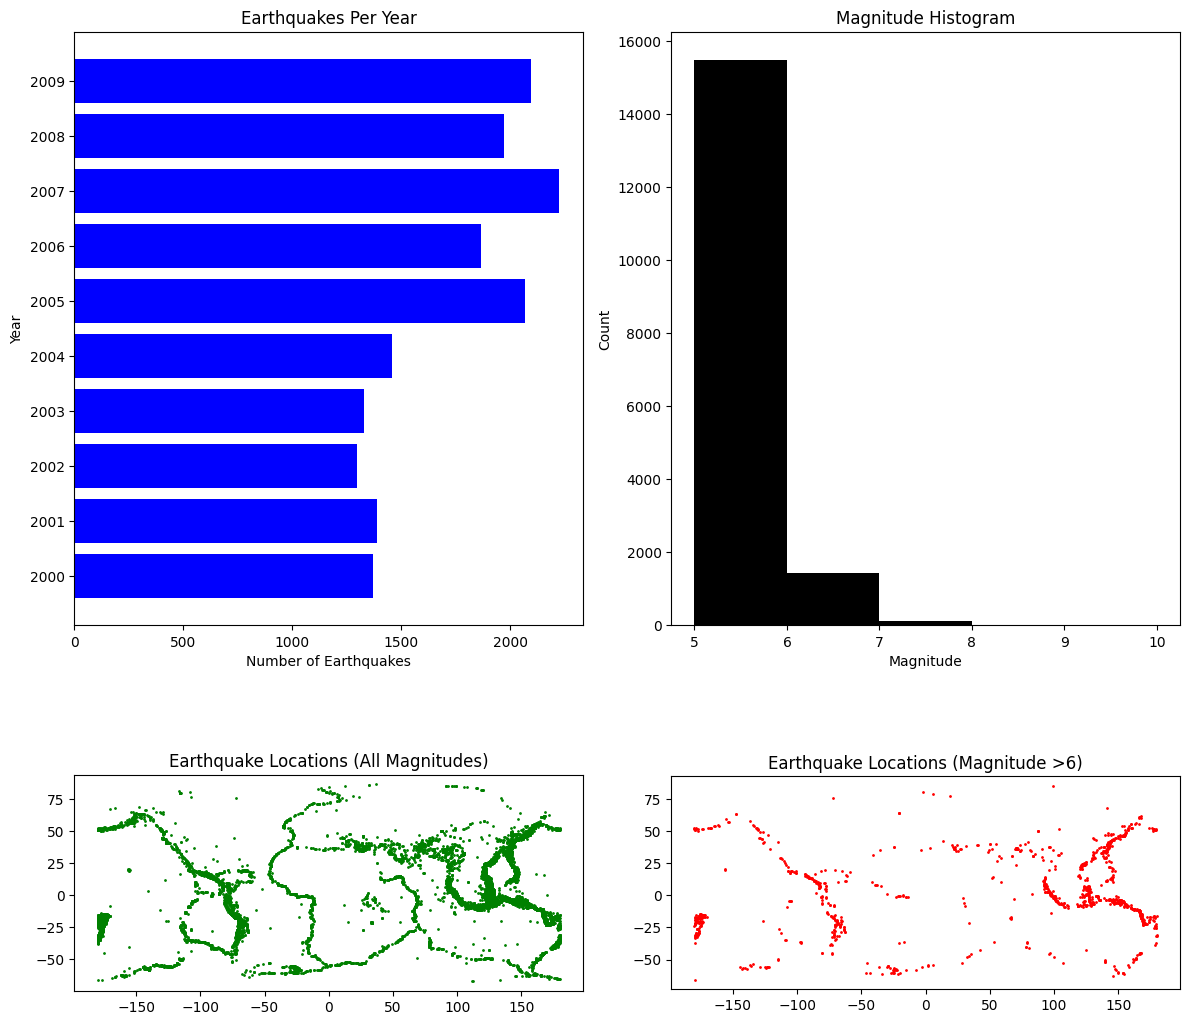

In [5]:
year, magnitude, longitude, latitude= np.load("earthquakes.npy").T
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

yearround = []
yearcount = [0,0,0,0,0,0,0,0,0,0]
years = range(2000, 2010)
for i in year:
    yearround.append(np.floor(i))
    yearcount[int(np.floor(i)) - 2000] += 1
axes[0,0].barh(years, yearcount, color="blue")
axes[0,0].set_title("Earthquakes Per Year")
axes[0,0].set_xlabel("Number of Earthquakes")
axes[0,0].set_ylabel("Year")
axes[0,0].set_yticks(years)

axes[0,1].hist(magnitude, bins=5, range=[5,10], color="black")
axes[0,1].set_title("Magnitude Histogram")
axes[0,1].set_xlabel("Magnitude")
axes[0,1].set_ylabel("Count")

axes[1,0].scatter(longitude, latitude, s=1, color="green")
axes[1,0].set_aspect("equal")
axes[1,0].set_title("Earthquake Locations (All Magnitudes)")

long6 = []
lat6 = []
for index, value in enumerate(magnitude):
    if value > 6:
        long6.append(longitude[index])
        lat6.append(latitude[index])

axes[1,1].scatter(long6, lat6, s=1, color="red")
axes[1,1].set_aspect("equal")
axes[1,1].set_title("Earthquake Locations (Magnitude >6)")
plt.tight_layout()

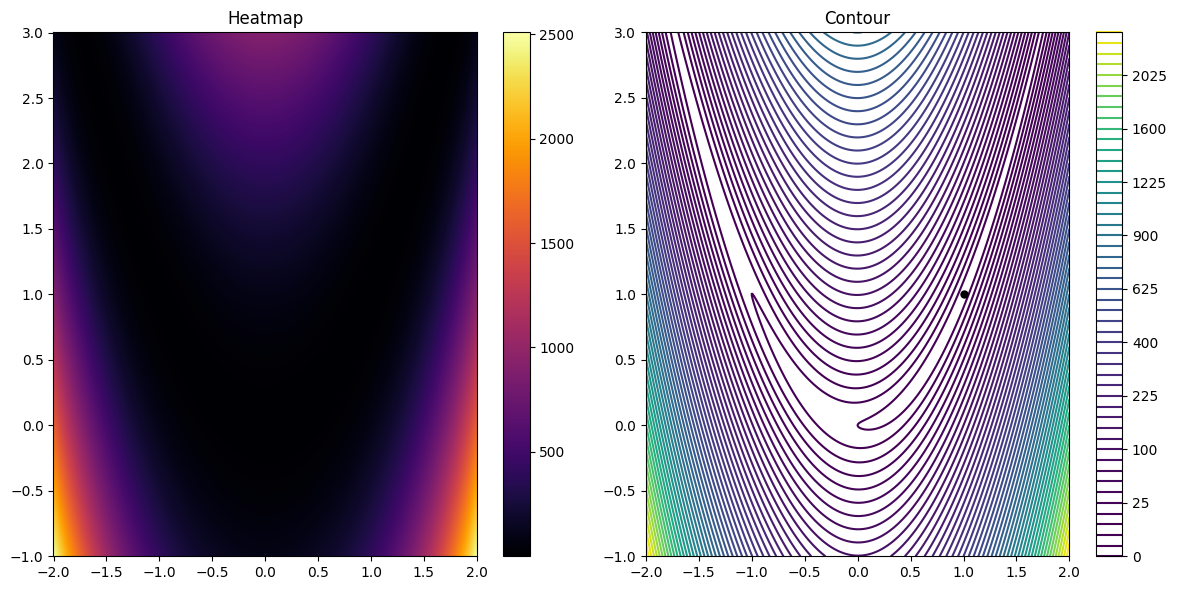

In [20]:
x = np.linspace(-2,2,1000)
y = np.linspace(-1,3,1000)
X,Y = np.meshgrid(x,y)
Z = ((1 - X) ** 2) + 100 * (Y - (X ** 2)) ** 2
fig, axes = plt.subplots(1,2, figsize=(12,6))
graph1 = axes[0].pcolormesh(X,Y,Z, cmap="inferno")
axes[0].set_title("Heatmap")
graph2 = axes[1].contour(X,Y,Z, [i **2 for i in range(50)])
axes[1].set_title("Contour")
axes[1].plot(1,1, marker = "o", markersize=5, color="black")
fig.colorbar(graph1)
fig.colorbar(graph2)
plt.tight_layout()


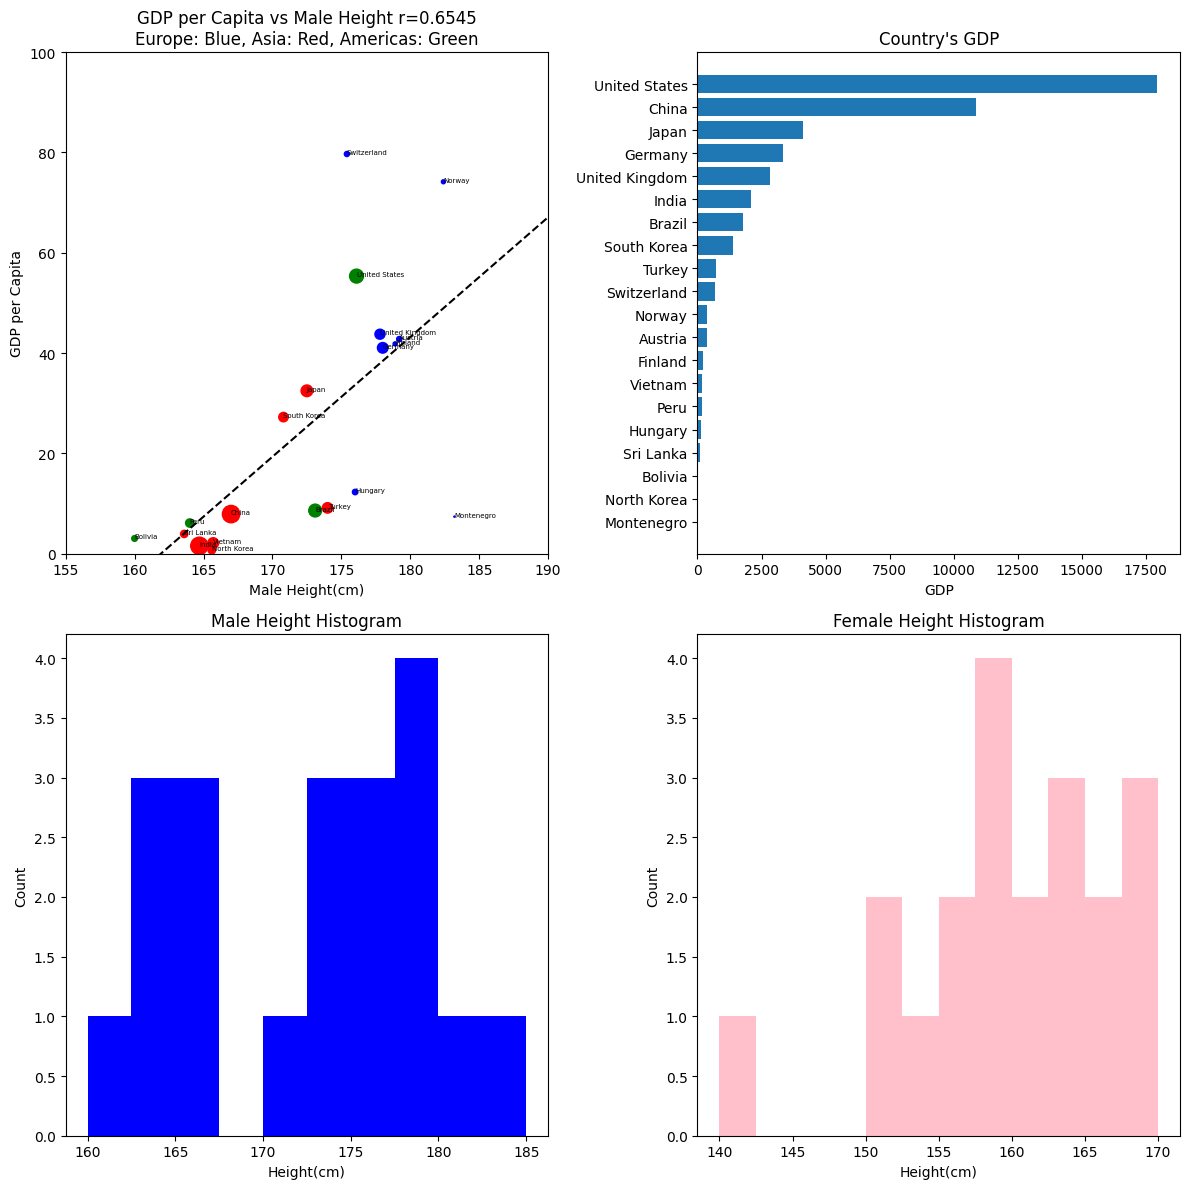

In [23]:
population, gdp, maleheight, femaleheight = np.load("countries.npy").T

countries = ["Austria", "Bolivia", "Brazil", "China", "Finland", "Germany", "Hungary", "India", "Japan", "North Korea", "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka", "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"]
gdppc = gdp / population
fig, axes = plt.subplots(2,2, figsize=(12,12))
area = 3 * np.log(population) ** 2
colors = np.array(['b', 'g', 'g', 'r', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'g', 'r', 'r', 'b', 'r', 'b', 'g', 'r'])
axes[0,0].scatter(maleheight, gdp / population, s=area, c=colors)
for index, txt in enumerate(countries):
    axes[0,0].annotate(txt, (maleheight[index], gdppc[index]), fontsize=5)
slope, intercept, r, p, sds = scipy.stats.linregress(maleheight, gdp / population)
axes[0,0].set_xlabel("Male Height(cm)")
axes[0,0].set_ylabel("GDP per Capita")
axes[0,0].set_title(f"GDP per Capita vs Male Height r={round(r,4)}\nEurope: Blue, Asia: Red, Americas: Green")
axes[0,0].set_xlim(155, 190)
axes[0,0].set_ylim(0,100)
x = np.linspace(155,190, 350)
y = x * slope + intercept
axes[0,0].plot(x,y, 2, color="black", linestyle="--")

axes[1,0].hist(maleheight, bins=10, range=[160, 185], color="blue")
axes[1,0].set_title("Male Height Histogram")
axes[1,0].set_xlabel("Height(cm)")
axes[1,0].set_ylabel("Count")

axes[1,1].hist(femaleheight, bins=12, range=[140,170], color="pink")
axes[1,1].set_title("Female Height Histogram")
axes[1,1].set_xlabel("Height(cm)")
axes[1,1].set_ylabel("Count")

sortedindices = np.argsort(gdp)
countriesarray = np.array(countries)
sortedcountries = countriesarray[sortedindices]

axes[0,1].barh(sortedcountries, gdp[sortedindices])
axes[0,1].set_yticks(countries)
axes[0,1].set_xlabel("GDP")
axes[0,1].set_title("Country's GDP")

plt.tight_layout()

Some important visualizations the chart show are: men are generally taller than women, male height and gdp per capita are correlated, and the gdp of countries is highly skewed.